# **CLUSTERING**

Clustering or cluster analysis is a machine learning technique, which groups the unlabelled dataset. It can be defined as "A way of grouping the data points into different clusters, consisting of similar data points. The objects with the possible similarities remain in a group that has less or no similarities with another group."

It does it by finding some similar patterns in the unlabelled dataset such as shape, size, color, behavior, etc., and divides them as per the presence and absence of those similar patterns.

It is an unsupervised learning
method, hence no supervision is provided to the algorithm, and it deals with the unlabeled dataset.

# **EXAMPLE**

Let's understand the clustering technique with the real-world example of Mall: When we visit any shopping mall, we can observe that the things with similar usage are grouped together. Such as the t-shirts are grouped in one section, and trousers are at other sections, similarly, at vegetable sections, apples, bananas, Mangoes, etc., are grouped in separate sections, so that we can easily find out the things.

# **TYPES OF CLUSTERING MODELS**

1.Partitioning Clustering
2.Density-Based Clustering
3.Distribution Model-Based Clustering
4.Hierarchical Clustering
5.Fuzzy Clustering

# **Partitioning Clustering**

It is a type of clustering that divides the data into non-hierarchical groups. It is also known as the centroid-based method. The most common example of partitioning clustering is the K-Means Clustering algorithm.
In this type, the dataset is divided into a set of k groups, where K is used to define the number of pre-defined groups. The cluster center is created in such a way that the distance between the data points of one cluster is minimum as compared to another cluster centroid.

# **Implementation of k means algorithm with scikit-learn**

In [3]:
#import dependencies
from sklearn.cluster import KMeans
from matplotlib import pyplot as plt

import numpy as np
import pandas as pd

import seaborn as sns
sns.set_style("darkgrid")


In [4]:
#load dataset
X = pd.read_csv('https://raw.githubusercontent.com/krishnaik06/DBSCAN-Algorithm/master/Mall_Customers.csv')
X.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [8]:
#filter the columns
X = X.filter(["Annual Income (k$)", "Spending Score (1-100)" ], axis = 1)
X


,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40
...,...,...
195,120,79
196,126,28
197,126,74
198,137,18


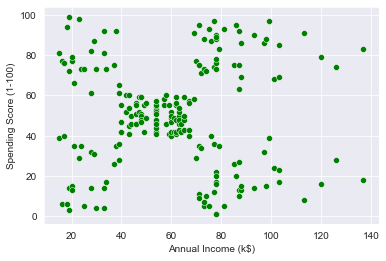

In [9]:
#plot the raw data
sns.scatterplot(data = X, x="Annual Income (k$)", y= "Spending Score (1-100)", c = ["green"])
plt.show()

In [10]:
#apply scikit-learn kmeans clustering
model = KMeans(n_clusters= 5)
model.fit(X)


KMeans(n_clusters=5)

In [11]:
#print the centroids
print(model.cluster_centers_)


[[86.53846154 82.12820513]
 [26.30434783 20.91304348]
 [88.2        17.11428571]
 [25.72727273 79.36363636]
 [55.2962963  49.51851852]]


In [14]:
#Data points belonging to different clusters are assigned labels by the k-means clustering algorithm in Scikit-learn.
#To see these label values, you can use the labels_ attribute of your k-means clustering model.
print(model.labels_)

[1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1
 3 1 3 1 3 1 4 1 3 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4
 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4
 4 4 4 4 4 4 4 4 4 4 4 4 0 2 0 4 0 2 0 2 0 4 0 2 0 2 0 2 0 2 0 4 0 2 0 2 0
 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2
 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0]


<AxesSubplot:xlabel='Annual Income (k$)', ylabel='Spending Score (1-100)'>

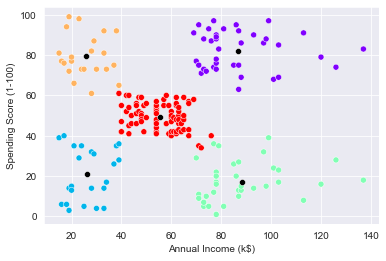

In [12]:
#plot the clustered data with centroids overlaid
sns.scatterplot(data = X, x="Annual Income (k$)", y= "Spending Score (1-100)", c= model.labels_, cmap= 'rainbow' )
sns.scatterplot(x=model.cluster_centers_[:, 0], y=model.cluster_centers_[:, 1], c=['black'])


The above output shows the 5 clusters identified by the algorithm. The customer segment that we want to target is the one in gold, at the top-right. From our previous script, we already know that the label or index for this cluster is 3.

With that information, we can create a new pandas dataframe containing the customer ids or indices and their corresponding cluster label.

In [24]:
#create dataframe with clustered labels
segmented_data = pd.DataFrame()
segmented_data['Customer Number'] = X.index.values
segmented_data['Segment'] = model.labels_


In [25]:
#Save segment 3 as a dataframe and display head
segmented_data = segmented_data[segmented_data.Segment==3]
segmented_data.head()

,Customer Number,Segment
123,123,3
125,125,3
127,127,3
129,129,3
131,131,3


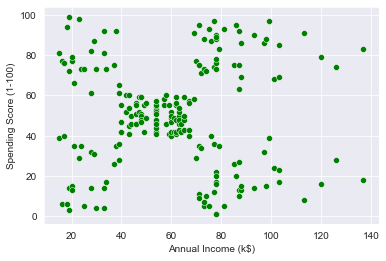

[[25.72727273 79.36363636]
 [88.2        17.11428571]
 [55.2962963  49.51851852]
 [86.53846154 82.12820513]
 [26.30434783 20.91304348]]


,Customer Number,Segment
123,123,3
125,125,3
127,127,3
129,129,3
131,131,3


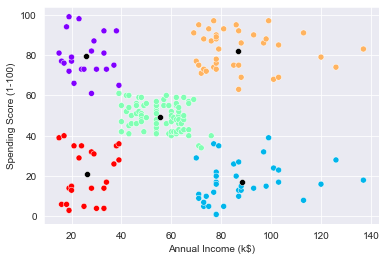

In [21]:
#import dependencies
from sklearn.cluster import KMeans
from matplotlib import pyplot as plt

import numpy as np
import pandas as pd

import seaborn as sns
sns.set_style("darkgrid")

#load dataset
X = pd.read_csv('https://raw.githubusercontent.com/krishnaik06/DBSCAN-Algorithm/master/Mall_Customers.csv')
X.head()

#filter the columns
X = X.filter(["Annual Income (k$)", "Spending Score (1-100)" ], axis = 1)

#plot the raw data
sns.scatterplot(data = X, x="Annual Income (k$)", y= "Spending Score (1-100)", c = ["green"])
plt.show()

#apply scikit-learn kmeans clustering
model = KMeans(n_clusters= 5)
model.fit(X)

#print the centroids
print(model.cluster_centers_)

#plot the clustered data with centroids overlaid
sns.scatterplot(data = X, x="Annual Income (k$)", y= "Spending Score (1-100)", c= model.labels_, cmap= 'rainbow' )
sns.scatterplot(x=model.cluster_centers_[:, 0], y=model.cluster_centers_[:, 1], c=['black'])

#create dataframe with clustered labels
segmented_data = pd.DataFrame()
segmented_data['Customer Number'] = X.index.values
segmented_data['Segment'] = model.labels_

#Save segment 3 as a dataframe and display head
segmented_data = segmented_data[segmented_data.Segment==3]
segmented_data.head()